In [171]:

# from scipy.optimize import minimize
import numpy as np
import sys
# from math import factorial
import scipy 
import scipy.special as ssp
from scipy.optimize import minimize
from scipy import integrate
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

from IPython.display import display, Math

In [172]:
import numpy as np

In [173]:
from numpy import exp, log, log10

In [174]:
# lambda_max, lambda_min = 
t_emerge, t_min, t_required = 0.7, 0.5, 3.5
T = 5

# PDF 

In [175]:
def pdf(lambdaa, distribution):
    lambda_max, lambda_min = max(lambdaa), min(lambdaa)
    term_1 = 1-np.exp(-lambdaa*(t_emerge - t_min))
    term_2 = 1-np.exp(-lambdaa*(t_required - t_min))
    p_d_m = term_1/term_2
    
    if distribution == "uniform":
        prior = lambdaa / (lambda_max - lambda_min)
    elif distribution == "log":
        prior = lambdaa /(lambdaa * log(lambda_max / lambda_min))
    elif distribution == 'inv':
        prior = 1 / lambdaa * 1 / (1/lambda_min - 1/lambda_max)
    elif distribution == 'log-log':
        prior = (1/(1 - log(lambdaa)))
    pdf = p_d_m * prior/ sum( p_d_m * prior )
    return pdf, prior

In [176]:
lambdaa = np.logspace (start = -3, stop= 3, num=15)

In [177]:
y_uni, prior_uni = pdf(lambdaa, "uniform")
y_log, prior_log = pdf(lambdaa, "log")
y_inv, prior_inv = pdf(lambdaa, "inv")
y_loglog, prior_loglog = pdf(lambdaa, "log-log")

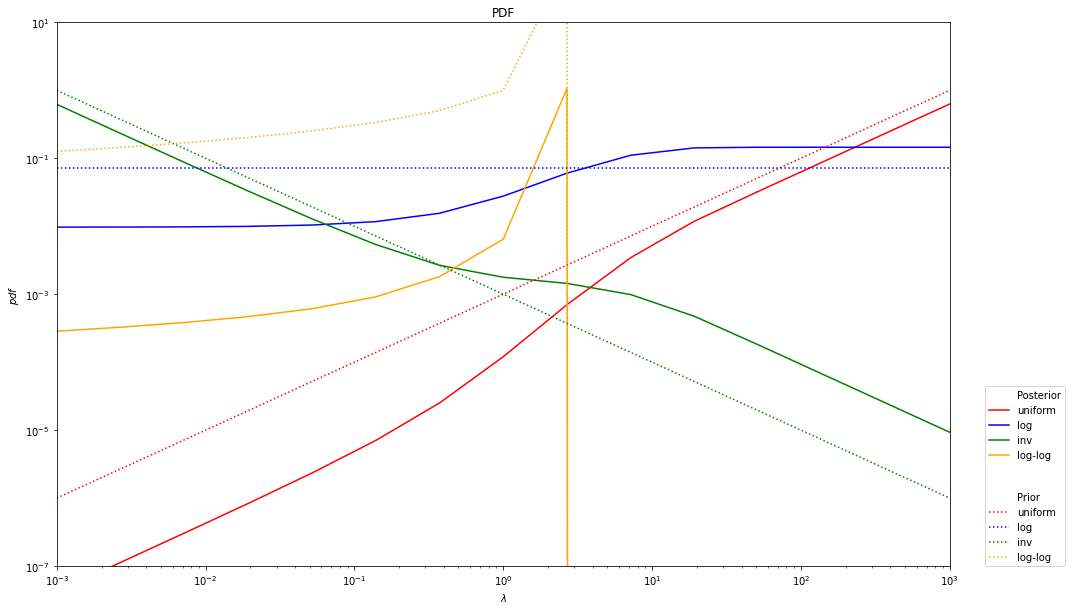

<Figure size 432x288 with 0 Axes>

In [178]:
plt.figure(figsize=(16, 10))

plt.plot([], [], ' ', label="Posterior")
plt.plot(lambdaa, y_uni, label = "uniform",color="red")
plt.plot(lambdaa, y_log, label = "log", color="blue")
plt.plot(lambdaa, y_inv, label = "inv", color = "green")
plt.plot(lambdaa, y_loglog, label = "log-log", color ="orange")

plt.plot([], [], ' ', label="\n")
plt.plot([], [], ' ', label="Prior")
plt.plot(lambdaa, prior_uni,':', label = "uniform",color="red")
plt.plot(lambdaa, prior_log, ':', label = "log", color="blue")
plt.plot(lambdaa, prior_inv,':', label = "inv" , color = "green")
plt.plot(lambdaa, prior_loglog, ':', label ="log-log", color ="orange")

plt.xlabel(r"$\lambda$")
plt.xscale("log")
plt.ylim(1e-7, 1e1)
plt.xlim(1e-3, 1e3)
plt.yscale("log")
plt.ylabel(r"$pdf$")
# plt.legend(loc="lower right")
l2 = plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
#  title="solid(__): posterior\ndashed(....)   prior")

plt.title("PDF")
plt.show()
plt.savefig('pdf.png', dpi=300, bbox_inches='tight')

In [179]:
# Lacki's plot on s and T

In [180]:
f = 1 - exp(-lambdaa*T)
f

array([0.00498752, 0.01332392, 0.03534455, 0.09202178, 0.2281567 ,
       0.50079964, 0.84491732, 0.99326205, 0.99999851, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [181]:
# lacki: log(log(1-p))
# lacki: log(log(1-p))
y = np.log(1-np.log(f))
y

array([1.84067920e+00, 1.67113385e+00, 1.46847582e+00, 1.21956954e+00,
       9.07339827e-01, 5.25644779e-01, 1.55735002e-01, 6.73799807e-03,
       1.49485854e-06, 2.22044605e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

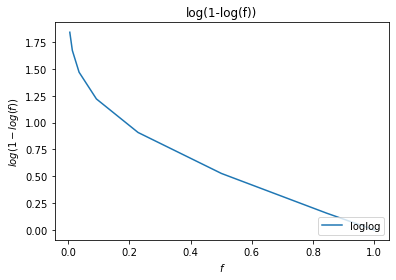

In [182]:
plt.plot(f,y, label = "loglog")

plt.xlabel(r"$f$")
plt.ylabel(r"$log(1-log(f))$")
plt.legend(loc="lower right")
plt.title("log(1-log(f))")
plt.show()

# Jacob's loglog plot

In [183]:
x = np.array([])

for i in range(10):
    a = np.linspace(10**(-10*(i+1)),10**(-10*i),1000)
    x = np.append(x,a)
x = np.append(x,10**(-323))

y = np.log(1-np.log(x))

x.sort()
y.sort()
y = y[::-1]

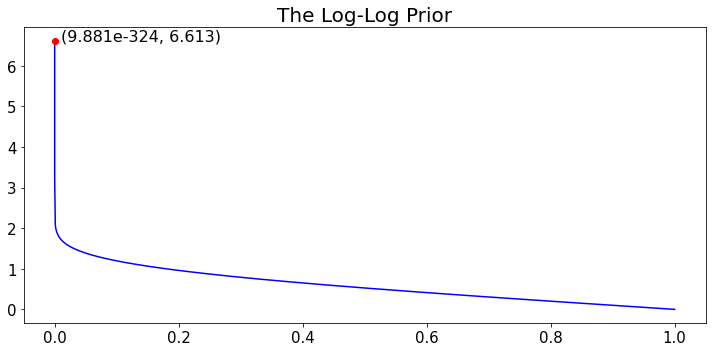

In [186]:
# create the general figure
fig1 = plt.figure(figsize=(10,5))
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
ax1.plot(x,y, 'b-')
ax1.plot(x[0],y[0], 'ro')
plt.annotate("({0:0.3e}, {1:0.3f})".format(x[0],y[0]), (0.01,y[0]), fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('The Log-Log Prior', fontsize=20)
plt.tight_layout()

plt.savefig('LogLog.png', dpi=300, bbox_inches='tight')

# CDF

In [187]:
def cdf(lambdaa, pdf, normalize=True):
    cdf = []
    for i in range(len(lambdaa)):
        cdf_value = np.trapz(pdf[:(i+1)], lambdaa[:(i+1)] )
        cdf.append(cdf_value)
    if normalize is True:
        norm = np.trapz(pdf, lambdaa)
        cdf = cdf/norm
    return cdf

In [188]:
lambdaa = np.logspace (start = -3, stop= 3, num=100)

y_uni, prior_uni = pdf(lambdaa, "uniform")
y_log, prior_log = pdf(lambdaa, "log")
y_inv, prior_inv = pdf(lambdaa, "inv")
y_loglog, prior_loglog = pdf(lambdaa, "log-log")

In [189]:
cdf_post_uni, cdf_uni_prior = cdf(lambdaa, y_uni), cdf(lambdaa, prior_uni)

cdf_post_log, cdf_uni_log = cdf(lambdaa, y_log), cdf(lambdaa, prior_log)

cdf_post_inv, cdf_uni_inv = cdf(lambdaa, y_inv), cdf(lambdaa, prior_inv)

cdf_post_loglog, cdf_uni_loglog= cdf(lambdaa, y_loglog), cdf(lambdaa, prior_loglog)

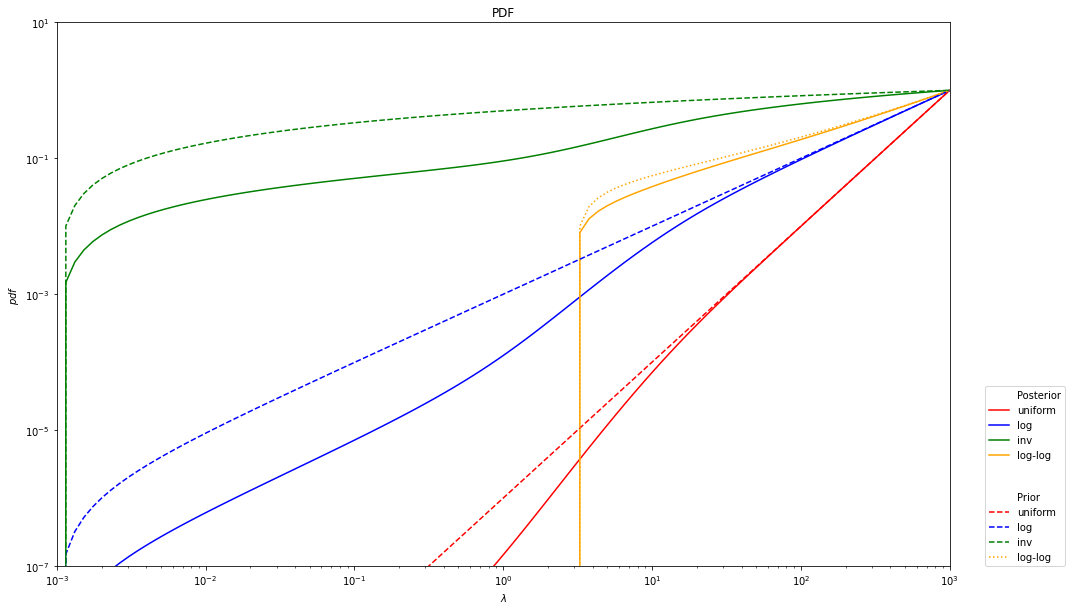

<Figure size 432x288 with 0 Axes>

In [190]:
plt.figure(figsize=(16, 10))

plt.plot([], [], ' ', label="Posterior")
plt.plot(lambdaa, cdf_post_uni, label = "uniform",color="red")
plt.plot(lambdaa, cdf_post_log, label = "log", color="blue")
plt.plot(lambdaa, cdf_post_inv, label = "inv", color = "green")
plt.plot(lambdaa, cdf_post_loglog, label = "log-log", color ="orange")

plt.plot([], [], ' ', label="\n")
plt.plot([], [], ' ', label="Prior")
plt.plot(lambdaa, cdf_uni_prior,'--', label = "uniform",color="red")
plt.plot(lambdaa, cdf_uni_log, '--', label = "log", color="blue")
plt.plot(lambdaa, cdf_uni_inv,'--', label = "inv" , color = "green")
plt.plot(lambdaa, cdf_uni_loglog, ':', label = "log-log", color ="orange")

plt.xlabel(r"$\lambda$")
plt.xscale("log")
plt.ylim(1e-7, 1e1)
plt.xlim(1e-3, 1e3)
plt.yscale("log")
plt.ylabel(r"$pdf$")
# plt.legend(loc="lower right")
l2 = plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
#  title="solid(__): posterior\ndashed(....)   prior")

plt.title("PDF")
plt.show()
plt.savefig('cdf.png', dpi=300, bbox_inches='tight')